### Stori challenge - fraud detection

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import os, datetime, calendar

# plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#####  Variables:
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

#### load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\migue\Documents\datasets_kaggle\Storicard\stori.csv")

In [3]:
df.head(3)

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,...,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,...,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,...,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0


In [4]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [5]:
df.head(3)

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_a

In [7]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


In [8]:
# are there null values?

df.isnull().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

#### 1.1 Plot an histogram of the balance amount for all the customers.
- The next chart show the histogram for the balance of all users

array([[<AxesSubplot:title={'center':'balance'}>]], dtype=object)

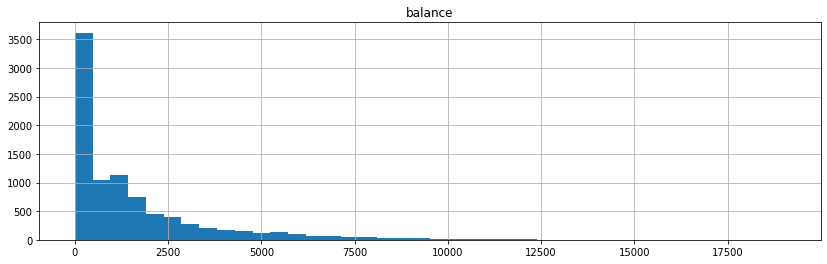

In [9]:
attributes = ["balance"]
df[attributes].hist(bins = 40, figsize = (14, 4))

#### 1.2 Report any structure you find and any hypotheses you have about that structure.
- In the next charts(histograms), most of the of the data have an arrengement of pareto principle as a consequence we assume that most of the clients have a low probability of a significantly amount of fraud and contrary for a few of them. In other words we need to be focus on the purchases with a high amount for the clients with a balance bigger than $2500.

array([[<AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'balance_frequency'}>,
        <AxesSubplot:title={'center':'purchases'}>],
       [<AxesSubplot:title={'center':'oneoff_purchases'}>,
        <AxesSubplot:title={'center':'installments_purchases'}>,
        <AxesSubplot:title={'center':'cash_advance'}>],
       [<AxesSubplot:title={'center':'purchases_frequency'}>,
        <AxesSubplot:title={'center':'prc_full_payment'}>,
        <AxesSubplot:>]], dtype=object)

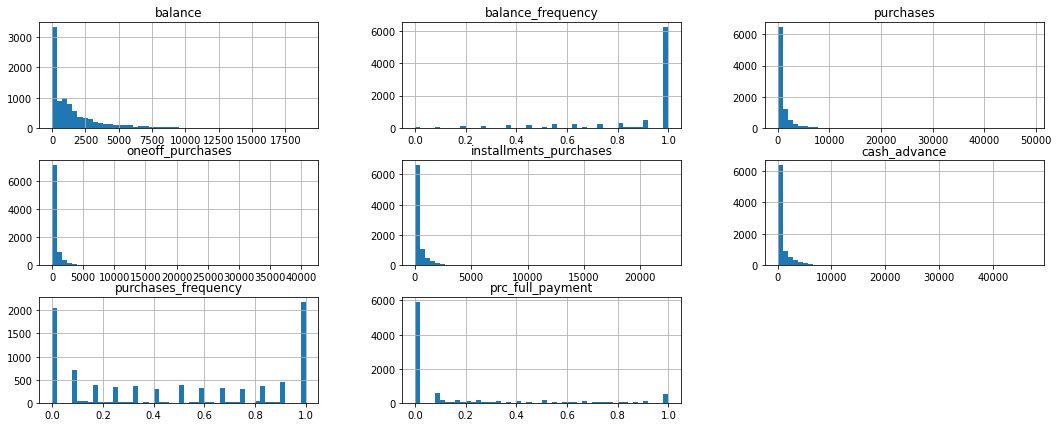

In [10]:
attributes = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
              'installments_purchases', 'cash_advance', 'purchases_frequency',
              'prc_full_payment']

df[attributes].hist(bins = 50, figsize = (18,7))

In [11]:
df["year_activated"] = df.activated_date.astype('datetime64').dt.year
df["month_activated"] = df.activated_date.astype('datetime64').dt.month

In [12]:
df.head()

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,year_activated,month_activated
0,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0,2,1000.0,201.802084,139.509787,0.000000,12,0,2019.0,10.0
1,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2019.0,10.0
2,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2019.0,10.0
3,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,1,1,7500.0,0.000000,NaN,0.000000,12,0,2019.0,10.0
4,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,0,1,1200.0,678.334763,244.791237,0.000000,12,0,2019.0,10.0


In [13]:
df["balance"].describe()

count     8948.000000
mean      1564.612804
std       2081.735635
min          0.000000
25%        128.234272
50%        873.385231
75%       2054.525476
max      19043.138560
Name: balance, dtype: float64

#### 1.3 Report mean and median balance, grouped by year and month of activated_date.
- The next 2 tables show the median and the mean as the request

In [14]:
attributes = ["year_activated", "month_activated", "balance"]

df[attributes].groupby(by = ["year_activated", "month_activated"]).mean()

balance
year_activated month_activated             
2019.0         10.0             2482.234166
               11.0             1848.704323
               12.0             2018.788906
2020.0         1.0              1854.535889
               2.0              1747.350977
               3.0              1554.973023
               4.0              1483.183191
               5.0              1214.333732
               6.0               939.997996
               7.0               649.717622

In [15]:
df[attributes].groupby(by = ["year_activated", "month_activated"]).median()

balance
year_activated month_activated             
2019.0         10.0             1524.409377
               11.0             1082.071173
               12.0             1162.588384
2020.0         1.0              1175.749847
               2.0               994.841733
               3.0               828.954823
               4.0               910.141912
               5.0               734.557681
               6.0               472.791862
               7.0               221.291290

In [16]:
df["cust_id2"] = df.cust_id.map(lambda x: x.lstrip('C'))    # define the cust_id avoiding the letters
df["activated_date_YYMM"] = df.activated_date.astype('datetime64').dt.strftime('%Y-%m') # define the date as format YY - MM
df["last_payment_date"] = df.last_payment_date.astype('datetime64').dt.strftime('%Y-%m-%d') # define the date as format YY - MM - DD
df["cash_advance_ptg"] = df.cash_advance / df.credit_limit  # define the % of cash advance

#### 2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit

- The next table show the data as the request need it


In [17]:
attributes = ["cust_id2", "activated_date_YYMM", "last_payment_date", "cash_advance",
              "credit_limit", "cash_advance_ptg"]

df[attributes].head(10)

,cust_id2,activated_date_YYMM,last_payment_date,cash_advance,credit_limit,cash_advance_ptg
0,10001,2019-10,2020-09-09,0.000000,1000.0,0.000000
1,10002,2019-10,2020-07-04,6442.945483,7000.0,0.920421
2,10003,2019-10,2020-09-17,0.000000,7500.0,0.000000
3,10004,2019-10,2020-08-24,205.788017,7500.0,0.027438
4,10005,2019-10,2020-10-20,0.000000,1200.0,0.000000
5,10006,2019-10,2020-07-27,0.000000,1800.0,0.000000
6,10007,2019-10,2020-10-30,0.000000,13500.0,0.000000
7,10008,2019-10,2020-08-06,0.000000,2300.0,0.000000
8,10009,2019-10,2020-10-06,NaN,7000.0,NaN
9,10010,2019-10,2020-05-06,0.000000,11000.0,0.000000


In [18]:
# the next fields are no necessary for the next steps as a consequence I'll to drop them

columns2drop = ["year_activated", "month_activated", "cust_id2", 
                "activated_date_YYMM", "cash_advance_ptg"]
df.drop(columns = columns2drop, inplace = True)

#### 3.2 What explanatory variable was the most powerful predictor for fraud?
- There many different variables into the daset but we need to pay attention in the purchases & one off purchases, that make sense because if someone wanna make a fraud, he/shee need to purchase a great amount in a short period of time

In [19]:
# correlation values
corr_matrix = df.corr()
corr_matrix["fraud"].sort_values(ascending = False)

fraud                               1.000000
purchases                           0.520895
oneoff_purchases                    0.475725
payments                            0.469451
installments_purchases              0.357483
purchases_trx                       0.310419
cash_advance                        0.203466
balance                             0.203263
credit_limit                        0.200757
cash_advance_trx                    0.142664
oneoff_purchases_frequency          0.120314
minimum_payments                    0.107885
purchases_installments_frequency    0.071719
purchases_frequency                 0.071416
cash_advance_frequency              0.070455
balance_frequency                   0.035241
prc_full_payment                    0.029712
tenure                              0.016859
Name: fraud, dtype: float64

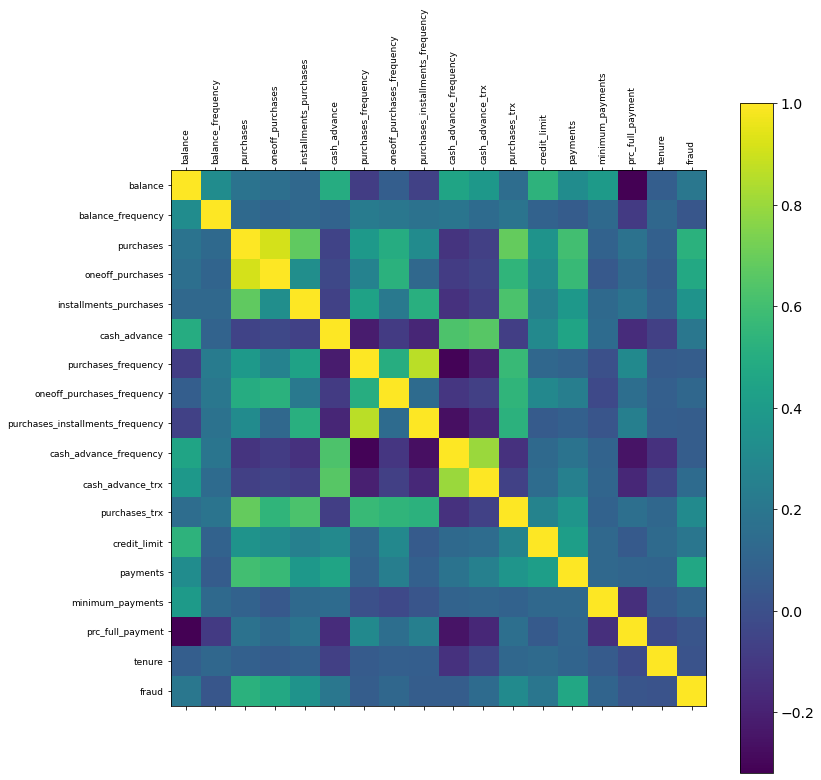

In [20]:
f = plt.figure(figsize = (12,12))
plt.matshow(corr_matrix, fignum = f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize = 9, rotation = 90)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize = 9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)

#### 3.1 Build a predictive model for fraud

- To continue with a predictive model, the first steps are preprocessing the info
- For this case we have two different variables, categorical and numerical
- Base on the above point the first approach is to split the variables, preprocessing them (standard scaler, fill NA values, etc) and  finally union them
- Note: the ML models performance better with homogeneous scales

In [21]:
# the current dataset does not have a definition for 
# train & test as a consequence we need to split it, 70% train & 30% test

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 42)
print(len(df), "total")
print(len(df_train), "total + ", len(df_test), "test")

8950 total
6265 total +  2685 test


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

try:
    from sklearn.impute import SimpleImputer

except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

numeric_variables = ['balance','balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency',
                     'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
                     'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment','tenure']

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_variables)),
    ("imputer", SimpleImputer(strategy = "median")),
    ("std_sclare", StandardScaler())
])

In [24]:
num_pipeline.fit_transform(df_train)

array([[-0.43862128,  0.52026863,  1.81043058, ..., -0.25719042,
         0.04122484,  0.35987815],
       [ 0.37773173,  0.52026863, -0.04766891, ...,  0.14286515,
        -0.52804474,  0.35987815],
       [-0.21749726,  0.52026863, -0.40156093, ..., -0.21631687,
        -0.52804474,  0.35987815],
       ...,
       [-0.72589899, -2.9245117 , -0.46344859, ..., -0.31771433,
         2.88756588,  0.35987815],
       [-0.74486421, -3.6900175 , -0.37106543, ..., -0.22042028,
        -0.52804474,  0.35987815],
       [-0.49395578,  0.52026863,  1.04445643, ..., -0.27427421,
         0.610491  , -1.14121146]])

In [25]:
# fill missing values for categorical strings

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index = X.columns)
        return self
    
    def transform(self, X, y = None):
        return X.fillna(self.most_frequent_)

# =============================================================================================
# =============================================================================================

try: 
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder

except ImportError:
    from future_encoders import OneHotEncoder

In [26]:
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["activated_date", "last_payment_date"])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse = False)),
])

In [27]:
cat_pipeline.fit_transform(df_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [29]:
X_train = preprocess_pipeline.fit_transform(df_train)
X_train

array([[-0.43862128,  0.52026863,  1.81043058, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37773173,  0.52026863, -0.04766891, ...,  0.        ,
         0.        ,  0.        ],
       [-0.21749726,  0.52026863, -0.40156093, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.72589899, -2.9245117 , -0.46344859, ...,  0.        ,
         0.        ,  0.        ],
       [-0.74486421, -3.6900175 , -0.37106543, ...,  0.        ,
         0.        ,  0.        ],
       [-0.49395578,  0.52026863,  1.04445643, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
y_train = df_train["fraud"]

### Support vector machine

In [31]:
from sklearn.svm import SVC

svm_clf = SVC(kernel = "poly", degree = 10, coef0 = 100, C = 5)
svm_clf.fit(X_train, y_train)

SVC(C=5, coef0=100, degree=10, kernel='poly')

In [32]:
X_test = preprocess_pipeline.transform(df_test)
y_pred = svm_clf.predict(X_test)
y_test = df_test["fraud"]

In [33]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 11)
svm_scores.mean()

0.9966481950202236

#### Results:
- As we can watched in the above result, the accurancy is near to 100%, the short answer is that the model is overfitting
- If we deep dive in the results from the model, we can watched that the efficiency of the model is 84%
- The precision is 92 % & the recall is 55 % for detecs a fraud

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=========================================")
print("Confussion matrix")
print(conf_matrix)
print("=========================================")
print("Accuracy")
print(accuracy)
print("=========================================")
print("Classification report\n")
print(report)

Confussion matrix
[[2662    1]
 [  10   12]]
Accuracy
0.9959031657355679
Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2663
           1       0.92      0.55      0.69        22

    accuracy                           1.00      2685
   macro avg       0.96      0.77      0.84      2685
weighted avg       1.00      1.00      1.00      2685



### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
forest_clf.fit(X_train, y_train)
y_predict_forest = forest_clf.predict(X_test)

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_scores.mean()

0.9955304686345547

#### Results:
- As we can watched in the above result, the accurancy is near to 100%, the short answer is that the model is overfitting
- If we deep dive in the results from the model, we can watched that the efficiency of the model is 71%
- The precision is 100 % & the recall is 27 % for detecs a fraud

In [36]:
conf_matrix_forest = confusion_matrix(y_test, y_predict_forest)
accuracy_forest = accuracy_score(y_test, y_predict_forest)
report_forest = classification_report(y_test, y_predict_forest)

print("=========================================")
print("Confussion matrix")
print(conf_matrix_forest)
print("=========================================")
print("Accuracy")
print(accuracy_forest)
print("=========================================")
print("Classification report\n")
print(report_forest)

Confussion matrix
[[2663    0]
 [  16    6]]
Accuracy
0.9940409683426443
Classification report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2663
           1       1.00      0.27      0.43        22

    accuracy                           0.99      2685
   macro avg       1.00      0.64      0.71      2685
weighted avg       0.99      0.99      0.99      2685



### Conclusions:

- The most variables in order to predict a fraud are the purchases & the one off purchases
- We use two different models to predic (SVC & Random forest) but there exists others like KNN or Logistic regression, the next step is to deep dive in other models and decide which of them have the best performance
- The first approach is a shallow learning through ML but may with deep learning the performance can be improved
- The accurancy is near to 100% for both models, the first idea is a overfitting
- What is the most important KPI in order to know if the model is good? The recall, the recall measure the ratio of positive instance that are correctly detected and we need to be focus on that
- The SVC is best model for this exercise but we need to improved it through fine tunning and grid search

#### Contact:
- Name: Miguel Angel Velazco Orihuela
- email: miguel.angel.velazco.mav@gmail.com
- LinkedIn: www.linkedin.com/in/miguel-angel-velazco-orihuela-34551787
- Github: https://github.com/miguelvelazco0116